In [1]:
# Import the libraries that will be relevant throughout
import os, json, pickle, pandas, random
import graphviz

from utils import get_pred

In [ ]:
# Define which model to analyze
model_name = 'hcrn'
with open(f'analysis_results/results_{model_name}.json', 'r') as f:
    model_results = json.load(f)

In [29]:
# Define which composition rule/question type and error rate we are interested in
split_type = 'composition'
slice_name = 'Shorter Choose'

# Set '0' for CA, 'any' for RWR and a positive integer for RWR-n
error_rate = '0' 

only_incorrect = False
folder_name = f'error_analysis_folders/{model_name}/{split_type}/{slice_name}_{error_rate}'
if only_incorrect:
    folder_name += '_incorrect'
files = os.listdir(folder_name)
curr_try = 0

In [36]:
# Randomly sample a file
file = random.choice(files)
with open(f'{folder_name}/{file}', 'r') as f:
    values = json.load(f)
print(f'Currently on video {file[:5]}, which contains {len(values)} compositions')

curr_try += 1
print(f'Currently on try: {curr_try}/20')

Currently on video XVLE2, which contains 1 compositions
Currently on try: 4/20


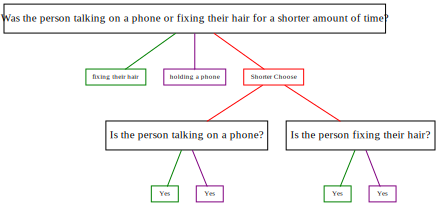

In [37]:
# Randomly sample a question
file_idx = random.choice([i for i in range(len(values))])
value = values[file_idx]

hierarchy = value["hierarchy"]
subquestions = value["subquestions"]

#print(question_dict['subquestion'])

d=graphviz.Digraph(format='png')
d.graph_attr['ratio']='fill'
d.graph_attr['mindist']='0'

# Place nodes for questions and answers
for i, (subq, info) in enumerate(subquestions.items()):
    d.node(subq, _attributes={'shape':'box', 'height':'0.4', 'fontsize':'11'})

    answer = info['answer']
    if answer is None:
        answer = "N/A"
    d.node(f'answer_{i}', label=answer, _attributes={'fontsize':'7',
                                                             'shape':'box',
                                                             'height':'0.05',
                                                             'width':'0.1',
                                                             'color':'green'})
    d.node(f'pred_{i}', label=get_pred(info, model_results), _attributes={'fontsize':'7',
                                                               'shape':'box',
                                                               'height':'0.05',
                                                               'width':'0.1',
                                                               'color':'purple'})
    
    d.edge(subq, f'answer_{i}', _attributes={'len':'0', 'minlen':'1.0',
                                            'arrowsize':'0.01', 'color':'green'})
    d.edge(subq, f'pred_{i}', _attributes={'len':'0', 'minlen':'1.0',
                                           'arrowsize':'0.01', 'color':'purple'})
    
for i, (question, comp_subqs) in enumerate(hierarchy.items()):
    for comp, subqs in comp_subqs.items():
        d.node(f'{comp}_{i}', label=comp, _attributes={'fontsize':'7', 'shape':'box',
                                                      'height':'0.05', 'width':'0.1', 'color':'red'})
        
        d.edge(question, f'{comp}_{i}', _attributes={'len':'0', 'minlen':'1.0',
                                                    'arrowsize':'0.01', 'color':'red'})
        
        for subq in subqs:
            d.edge(f'{comp}_{i}', subq, _attributes={'len':'0', 'minlen':'1.0',
                                                     'arrowsize':'0.01', 'color':'red'})
d

In [5]:
# Cell to save the resulting image
save_folder = f'error_analysis_visualizations/{model_name}/{split_type}/{slice_name}_{error_rate}'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
d.render(f'{save_folder}/{file[:5]}_{file_idx}', view=False)

'error_analysis_visualizations/hcrn/composition/Longer Choose_0/GTHNX_0.png'